In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns
import sys
sys.path.insert(1, '../../utils/')
import src_utils

# 1. Read in master DFs

In [58]:
master_df = pd.read_csv('../../utils/point_muts.csv', index_col=0, header=[0,1])
residuals = pd.read_csv('../../utils/residuals.csv', index_col=0)
diffsel = pd.read_csv('../../utils/diffsel.csv', index_col=0)

# 2. Create variant index for heatmaps

In [59]:
src_utils.create_variant_index?

Signature: src_utils.create_variant_index(df)
Docstring:
Create variant index from DataFrame with index in hgvs format.

Args:
    df: DataFrame with index in hgvs format
Returns:
    variant_index: variant in [1 letter WTAA][position][1 letter MutAA]
                   format, maintaining original order (list)
    
File:      ~/fowler/src/utils/src_utils.py
Type:      function


In [60]:
variant_index = src_utils.create_variant_index(master_df)

# 3. Create individual heatmaps for both radicicol and DMSO conditions

In [61]:
src_utils.create_heatmap_arr?

Signature: src_utils.create_heatmap_arr(scores, variant_index)
Docstring:
Create heatmap from given scores.

Args:
    scores: scores in order of variant_index (np array)
    variant_index: order of variants in the format 
                    [1 letter WTAA][position][1 letter MutAA] (list)
Returns:
    heatmap_arr: 2D array where positions=rows, aas=cols
File:      ~/fowler/src/utils/src_utils.py
Type:      function


In [62]:
# Create the arrays
rad_heatmap_arr = src_utils.create_heatmap_arr(
    scores=master_df.loc[:, ('Radicicol', 'score')],
    variant_index=variant_index)
dmso_heatmap_arr = src_utils.create_heatmap_arr(
    scores=master_df.loc[:, ('Zero', 'score')],
    variant_index=variant_index)
resid_heatmap_arr = src_utils.create_heatmap_arr(
    scores=residuals['raw_resids'],
    variant_index=variant_index)
diffsel_heatmap_arr = src_utils.create_heatmap_arr(
    scores=diffsel['envision_scaled_diffsel'],
    variant_index=variant_index
)

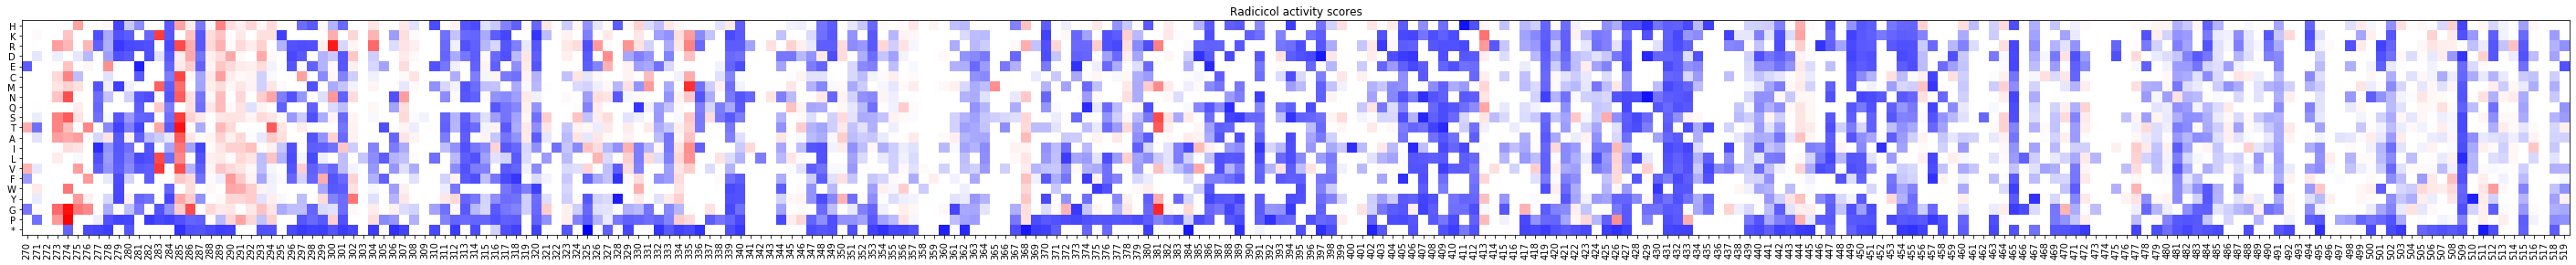

(<Figure size 3600x21600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120a6e510>)

In [63]:
# Plot
src_utils.plot_heatmap(rad_heatmap_arr, 'Radicicol activity scores')

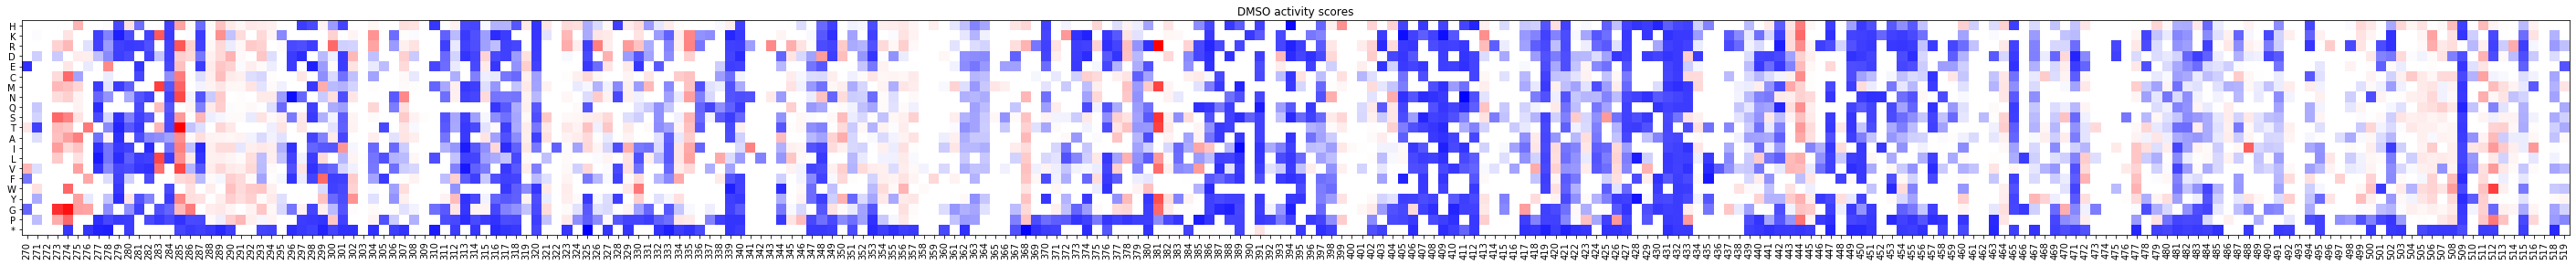

(<Figure size 3600x21600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1210efad0>)

In [64]:
src_utils.plot_heatmap(dmso_heatmap_arr, 'DMSO activity scores')

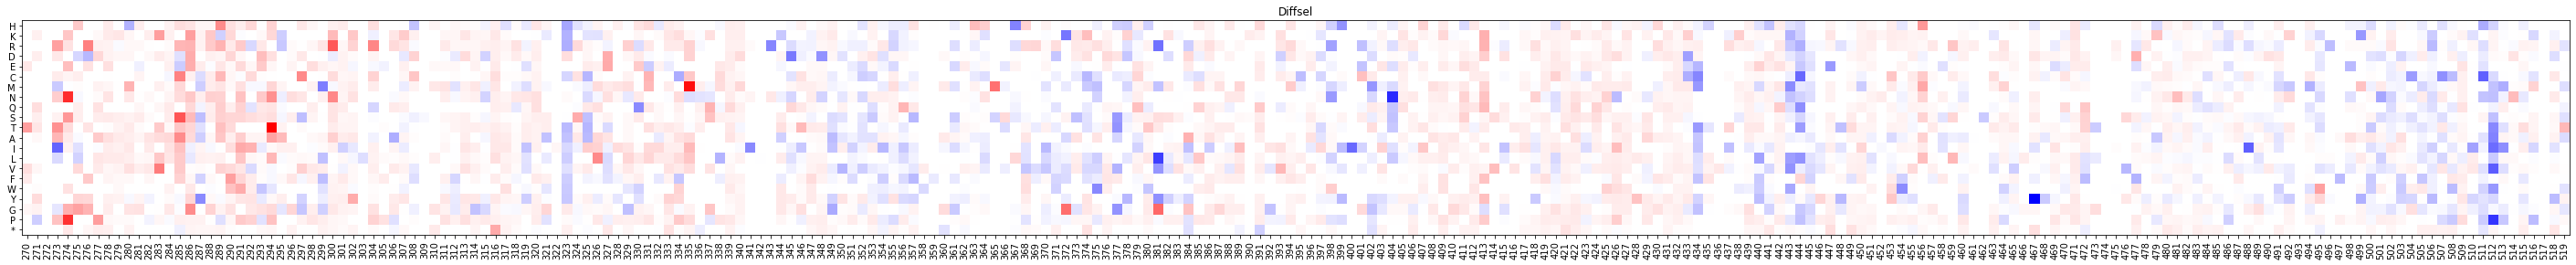

(<Figure size 3600x21600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x121330290>)

In [65]:
src_utils.plot_heatmap(diffsel_heatmap_arr, 'Diffsel')

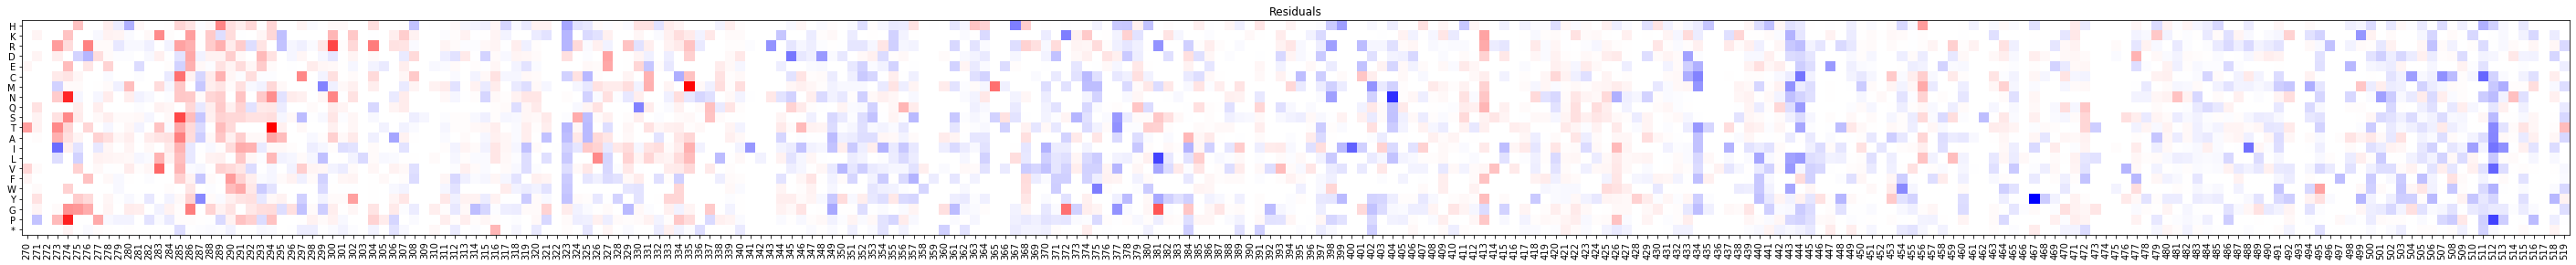

(<Figure size 3600x21600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x121330cd0>)

In [66]:
src_utils.plot_heatmap(resid_heatmap_arr, 'Residuals')

# Brief interlude for bug fixing

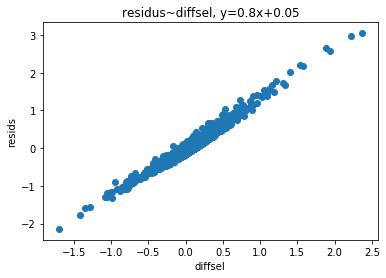

In [67]:
plt.scatter(diffsel['envision_scaled_diffsel'], residuals['raw_resids'])
plt.xlabel('diffsel')
plt.ylabel('resids')
plt.title('residus~diffsel, y=0.8x+0.05')
plt.show()

In [68]:
coef = np.polyfit(residuals['raw_resids'], diffsel['envision_scaled_diffsel'], 1)
poly1d_fn = np.poly1d(coef) 

# 4. Get positions in the heatmap

In [71]:
hsp90_dependent_pos = [323, 343, 399, 381, 443, 444, 511]
hsp90_inhibited_pos = [274, 283, 335, 270, 290, 291, 286,
                       276, 294, 413]
hsp90_dependent_pos.sort()
hsp90_inhibited_pos.sort()

In [80]:
dep_idx = [src_utils.__pos_idx_dict__[pos] for pos in hsp90_dependent_pos]
ihb_idx = [src_utils.__pos_idx_dict__[pos] for pos in hsp90_inhibited_pos]

In [352]:
max_abs = 5.0464877369376415

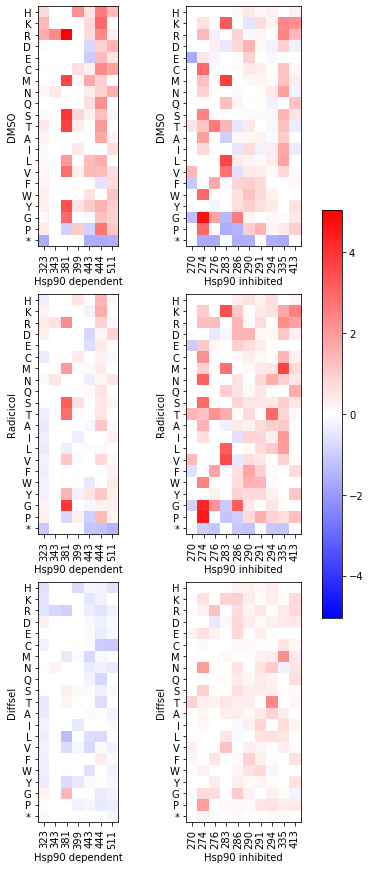

In [353]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7.5,15))
gs1 = gridspec.GridSpec(3, 2)
gs1.update(wspace=0.0000025, hspace=0.005) # set the spacing between axes. 

# Plot individual heatmaps
# Hsp90 dependent positions
heatmap = dmso_heatmap_arr[dep_idx, :]
title = 'DMSO activity (Hsp90 dependent)'
hm1 = axes[0,0].imshow(heatmap.T, cmap='bwr', vmin=-max_abs, vmax=max_abs)
#axes[0,0].set_title(title)

heatmap = rad_heatmap_arr[dep_idx, :]
title = 'Radicicol activity (Hsp90 dependent)'
hm3 = axes[1,0].imshow(heatmap.T, cmap='bwr', vmin=-max_abs, vmax=max_abs)
#axes[1,0].set_title(title)

heatmap = diffsel_heatmap_arr[dep_idx, :]
title = 'Diffsel (Hsp90 depenendent)'
hm5 = axes[2,0].imshow(heatmap.T, cmap='bwr', vmin=-max_abs, vmax=max_abs)
#axes[2,0].set_title(title)

tick_labels = hsp90_dependent_pos
for ax in [axes[0,0], axes[1,0], axes[2,0]]:
    # Set tick locations
    ax.set_yticks(np.arange(heatmap.shape[1]))
    ax.set_xticks(np.arange(heatmap.shape[0]))

    # Set tick labels
    ax.set_yticklabels(src_utils.__aa_idx_dict__.keys())
    ax.set_xticklabels(tick_labels, rotation=90)

# Hsp90 inhibited positions 
heatmap = dmso_heatmap_arr[ihb_idx, :]
title = 'DMSO activity (Hsp90 inhibited)'
hm2 = axes[0,1].imshow(heatmap.T, cmap='bwr', vmin=-max_abs, vmax=max_abs)
#axes[0,1].set_title(title)

heatmap = rad_heatmap_arr[ihb_idx, :]
title = 'Radicicol activity (Hsp90 inhibited)'
hm4 = axes[1,1].imshow(heatmap.T, cmap='bwr', vmin=-max_abs, vmax=max_abs)
#axes[1,1].set_title(title)

heatmap = diffsel_heatmap_arr[ihb_idx, :]
title = 'Diffsel (Hsp90 inhibited)'
hm6 = axes[2,1].imshow(heatmap.T, cmap='bwr', vmin=-max_abs, vmax=max_abs)
#axes[2,1].set_title(title)

tick_labels = hsp90_inhibited_pos
for ax in [axes[0,1], axes[1,1], axes[2,1]]:
    # Set tick locations
    ax.set_yticks(np.arange(heatmap.shape[1]))
    ax.set_xticks(np.arange(heatmap.shape[0]))

    # Set tick labels
    ax.set_yticklabels(src_utils.__aa_idx_dict__.keys())
    ax.set_xticklabels(tick_labels, rotation=90)
    
fig.colorbar(hm1, cmap='bwr', ax=axes, shrink=0.5)
# Set title

for ax in axes[0,:].flat:
    ax.set(ylabel='DMSO')
    
for ax in axes[1,:].flat:
    ax.set(ylabel='Radicicol')
    
for ax in axes[2,:].flat:
    ax.set(ylabel='Diffsel')

for ax in axes[:,0].flat:
    ax.set(xlabel='Hsp90 dependent')
    
for ax in axes[:,1].flat:
    ax.set(xlabel='Hsp90 inhibited')
# Hide x labels and tick labels for top plots and y ticks for right plots.
"""for ax in axes.flat:
    ax.label_outer()"""

# Show figure
plt.show()

# 5. Create dot plots for Src motifs

In [183]:
# Dictionaries of all clusters to create dot plots of
ea_clusters = {
    1: [447],
    2: [506, 508, 443, 444, 511, 512, 378, 381],
    3: [350],
    4: [368, 325, 375],
    5: [420, 307, 335],
    6: [283, 275, 285, 273, 274, 286],
    7: [330, 289, 290, 291, 293]
}
motifs = {
    'DFG loop': [407, 408, 409],
    'APE loop': [433, 434, 435]
}
pymol_clusters = {
    'Hsp90 inhibited': hsp90_inhibited_pos,
    'Hsp90 dependent': hsp90_dependent_pos
}

In [226]:
def format_for_dotplots(clusters, heatmap_arr):
    """
    Format heatmap array data for dotplots.
    
    Args:
        clusters: dict of clusters where key: str and vals: list(positions)
        heatmap_arr: heatmap of values (format returned by src_utils)
    Returns:
        cluster_names: list of cluster names in order of cluster_values
        cluster_values: list of values in order of cluster_names
        
    """
    
    cluster_names = []
    cluster_vals = []
    for cluster, cluster_pos in zip(clusters.keys(), clusters.values()):

        # Get all values in cluster in 1D numpy array
        idx = [src_utils.__pos_idx_dict__[pos] for pos in cluster_pos]
        vals = heatmap_arr[idx].flatten()

        # Append cluster name and values
        cluster_names = cluster_names + [cluster] * len(vals)
        cluster_vals = cluster_vals + list(vals)
        
    return(cluster_names, cluster_vals)
    

Text(0.5, 1.0, 'Diffsel')

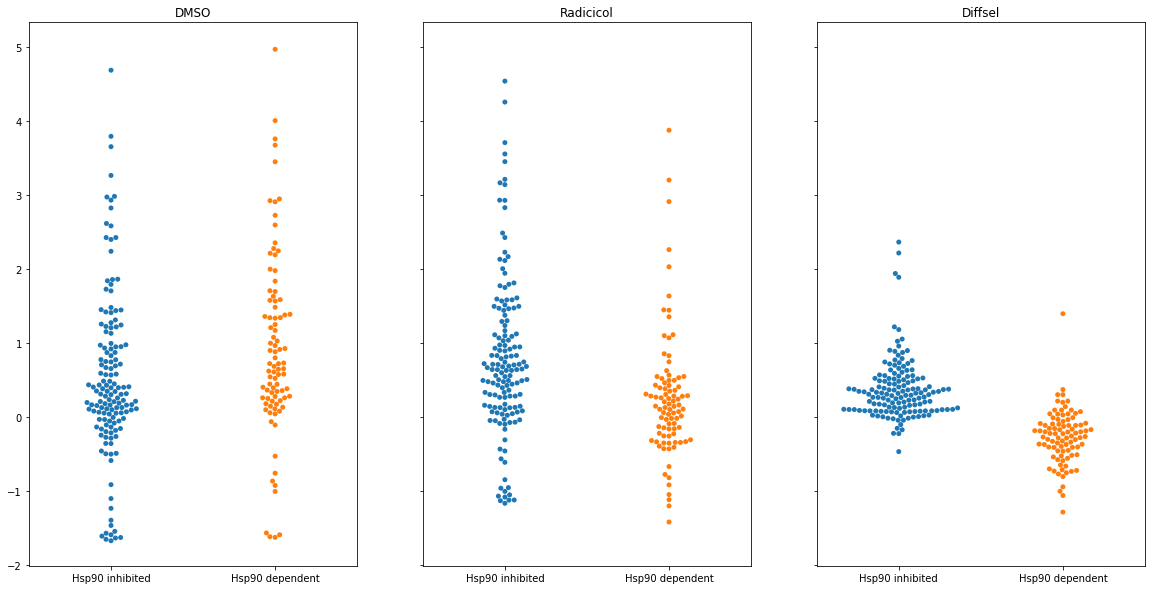

In [238]:
# Create cluster arrays for plotting
dmso_cluster_names, dmso_cluster_vals = format_for_dotplots(pymol_clusters, dmso_heatmap_arr)
rad_cluster_names, rad_cluster_vals = format_for_dotplots(pymol_clusters, rad_heatmap_arr)
diffsel_cluster_names, diffsel_cluster_vals = format_for_dotplots(pymol_clusters, diffsel_heatmap_arr)

fig, ax = plt.subplots(1,3, figsize=(20,10), sharey=True)

dmso_ax = sns.swarmplot(dmso_cluster_names, dmso_cluster_vals, ax=ax[0])
ax[0].set_title('DMSO')

rad_ax = sns.swarmplot(rad_cluster_names, rad_cluster_vals, ax=ax[1])
ax[1].set_title('Radicicol')

diffsel_ax = sns.swarmplot(diffsel_cluster_names, diffsel_cluster_vals, ax=ax[2])
ax[2].set_title('Diffsel')



Text(0.5, 1.0, 'Diffsel')

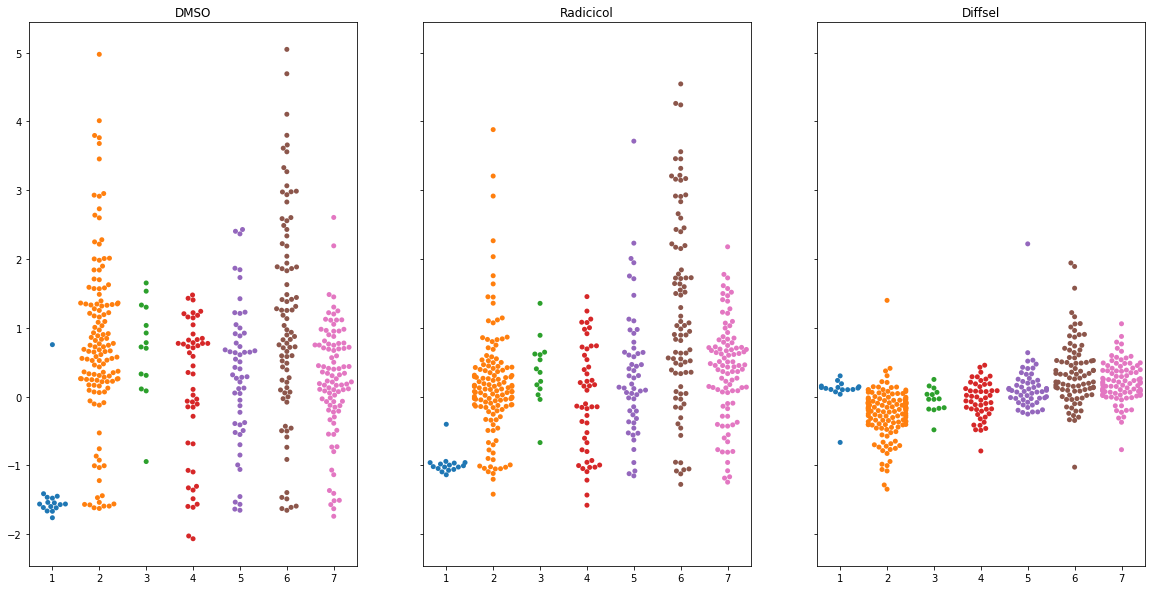

In [239]:
# Create cluster arrays for plotting
clusters = ea_clusters
dmso_cluster_names, dmso_cluster_vals = format_for_dotplots(clusters, dmso_heatmap_arr)
rad_cluster_names, rad_cluster_vals = format_for_dotplots(clusters, rad_heatmap_arr)
diffsel_cluster_names, diffsel_cluster_vals = format_for_dotplots(clusters, diffsel_heatmap_arr)

fig, ax = plt.subplots(1,3, figsize=(20,10), sharey=True)

dmso_ax = sns.swarmplot(dmso_cluster_names, dmso_cluster_vals, ax=ax[0])
ax[0].set_title('DMSO')

rad_ax = sns.swarmplot(rad_cluster_names, rad_cluster_vals, ax=ax[1])
ax[1].set_title('Radicicol')

diffsel_ax = sns.swarmplot(diffsel_cluster_names, diffsel_cluster_vals, ax=ax[2])
ax[2].set_title('Diffsel')



Text(0.5, 1.0, 'Diffsel')

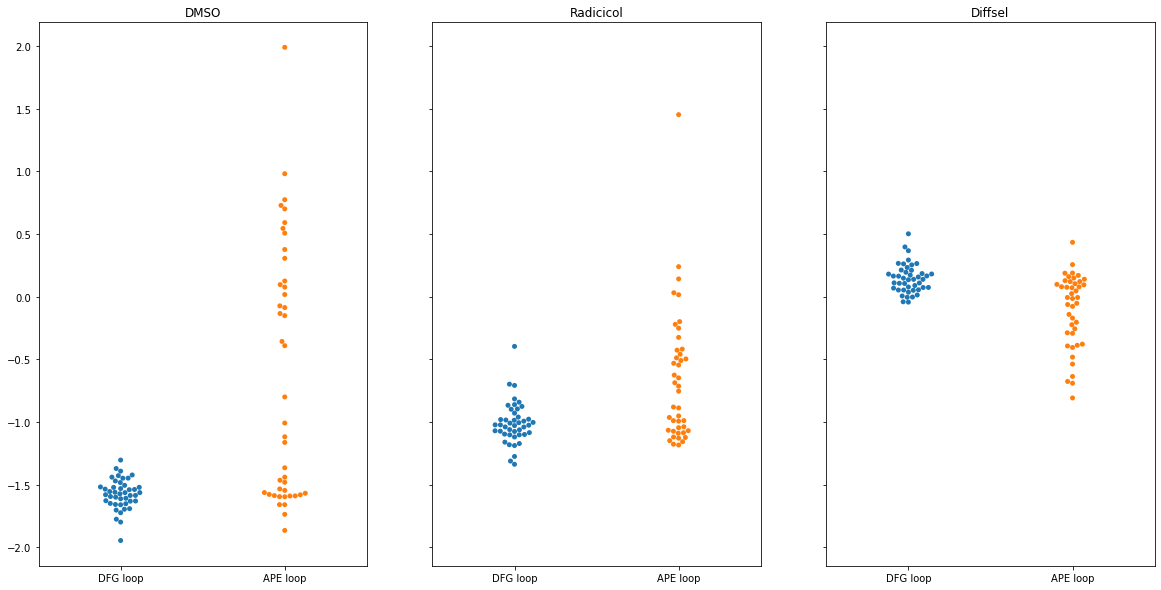

In [240]:
# Create cluster arrays for plotting
clusters = motifs
dmso_cluster_names, dmso_cluster_vals = format_for_dotplots(clusters, dmso_heatmap_arr)
rad_cluster_names, rad_cluster_vals = format_for_dotplots(clusters, rad_heatmap_arr)
diffsel_cluster_names, diffsel_cluster_vals = format_for_dotplots(clusters, diffsel_heatmap_arr)

fig, ax = plt.subplots(1,3, figsize=(20,10), sharey=True)

dmso_ax = sns.swarmplot(dmso_cluster_names, dmso_cluster_vals, ax=ax[0])
ax[0].set_title('DMSO')

rad_ax = sns.swarmplot(rad_cluster_names, rad_cluster_vals, ax=ax[1])
ax[1].set_title('Radicicol')

diffsel_ax = sns.swarmplot(diffsel_cluster_names, diffsel_cluster_vals, ax=ax[2])
ax[2].set_title('Diffsel')



# 6. Permute Rosetta data

In [243]:
rosetta_full_scores = pd.read_csv('../../utils/rosetta_full_scores.csv', index_col=0)
rosetta_scores = pd.read_csv('../../utils/rosetta_scores.csv', index_col=0)

In [244]:
diffsel

,raw_diffsel,envision_scaled_diffsel
_sy,-0.009982,0.053966
_wt,0.000000,0.053951
A296R,0.400707,0.045005
A296N,0.886004,0.311100
A296D,0.443924,0.053428
...,...,...
V478K,0.441207,0.065404
V478M,-0.071929,-0.089408
V478S,-0.016542,-0.083548
V478T,-0.184293,0.083874


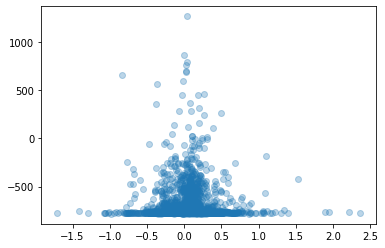

In [293]:
plt.scatter(diffsel['envision_scaled_diffsel'], np.random.permutation(rosetta_scores), alpha=0.3)

# 7. Look at DMSO scores for NaNs

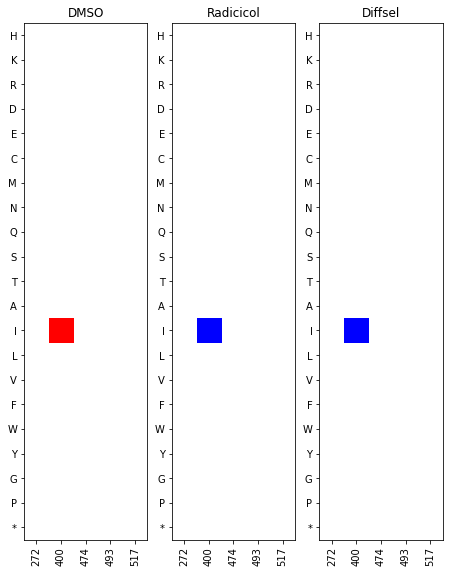

In [304]:
nan_pos = [272, 400, 474, 493, 517]
nan_idx = [src_utils.__pos_idx_dict__[pos] for pos in nan_pos]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7.5,15))

heatmap = dmso_heatmap_arr[nan_idx]
axes[0].imshow(heatmap.T, cmap='bwr', norm=DivergingNorm(0.0))
axes[0].set_title('DMSO')

heatmap = rad_heatmap_arr[nan_idx]
axes[1].imshow(heatmap.T, cmap='bwr', norm=DivergingNorm(0.0))
axes[1].set_title('Radicicol')

heatmap = diffsel_heatmap_arr[nan_idx]
axes[2].imshow(heatmap.T, cmap='bwr', norm=DivergingNorm(0.0))
axes[2].set_title('Diffsel')


tick_labels = nan_pos
for ax in [axes[0], axes[1], axes[2]]:
    # Set tick locations
    ax.set_yticks(np.arange(heatmap.shape[1]))
    ax.set_xticks(np.arange(heatmap.shape[0]))

    # Set tick labels
    ax.set_yticklabels(src_utils.__aa_idx_dict__.keys())
    ax.set_xticklabels(tick_labels, rotation=90)

# 8. Identify all dependent and inhibited positions

In [326]:
# Get average position diffsel value
ave_dep = np.nanmean(diffsel_heatmap_arr[dep_idx])
ave_ihb = np.nanmean(diffsel_heatmap_arr[ihb_idx])

# Average out heatmap by position
ave_diffsel = np.nanmean(diffsel_heatmap_arr, axis=-1)

# Get positions by index in heatmap array
all_dep_idx = [idx for idx, val in enumerate(ave_diffsel) if val <= ave_dep]
all_ihb_idx = [idx for idx, val in enumerate(ave_diffsel) if val >= ave_ihb]

# Convert position index to Src position
pos_idx = {value: key for key, value in src_utils.__pos_idx_dict__.items()}
all_dep = [pos_idx[idx] for idx in all_dep_idx]
all_ihb = [pos_idx[idx] for idx in all_ihb_idx]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


# 9. Create PyMOL map for DMSO and radicicol treatment

In [338]:
dmso_pymol = src_utils.heatmap_to_pymol(dmso_heatmap_arr)
rad_pymol = src_utils.heatmap_to_pymol(rad_heatmap_arr)

np.savetxt('../../PyMOL/dmso_scores.txt', dmso_pymol, delimiter='\n')
np.savetxt('../../PyMOL/rad_scores.txt', rad_pymol, delimiter='\n')

# 10. Save DMSO and radicicol heatmaps

In [350]:
dmso_heatmap_arr_pd = pd.DataFrame(dmso_heatmap_arr, index=src_utils.__pos_idx_dict__.keys(), columns=src_utils.__aa_idx_dict__.keys())
rad_heatmap_arr_pd = pd.DataFrame(rad_heatmap_arr, index=src_utils.__pos_idx_dict__.keys(), columns=src_utils.__aa_idx_dict__.keys())

dmso_heatmap_arr_pd.to_csv('../heatmaps/dmso_heatmap.csv')
rad_heatmap_arr_pd.to_csv('../heatmaps/rad_heatmap.csv')
